In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords



Read CSV file

In [96]:
df=pd.read_csv("/Users/pawanpanchal/Downloads/Test_data - Sheet1.csv")

In [97]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


Check Datatype of column

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.3+ KB


Stats of dataset

In [99]:
df.describe()

,Review,date,Location
count,6393,6448,1711
unique,6383,397,1082
top,Amazing\n \n Read more\n Read less,Jun-19,United States of America
freq,4,145,116


Data Cleaning

In [100]:
# Check null values

df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

Handelling Null values

In [101]:
# Replace null values in location column

df['Location'].fillna('United States of America', inplace=True)

In [102]:
# Remove null values from Review column

df=df[df["Review"].notnull()]

In [103]:
df.isnull().sum()   

Review      0
date        0
Location    0
dtype: int64

-----------------------------------------------------------------------------------------

Remove unwanted char/words/sign from Review column

In [104]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [105]:
df['Review'] = df['Review'].apply(clean)

In [106]:
df['Review'][0]

'impressed resort great staff main resort pool bar blast clean professional staff great location reasonable read read less'

In [107]:
# Remove "read" & "less" from reviews

df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() != 'read']))

In [108]:
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() != 'less']))

In [109]:
df['Review'][0]

'impressed resort great staff main resort pool bar blast clean professional staff great location reasonable'

----------------------------------------------------------------------------------------

Top 10 most frequently occuring words

In [110]:
mostCommon = Counter(corpus).most_common(10)

In [111]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


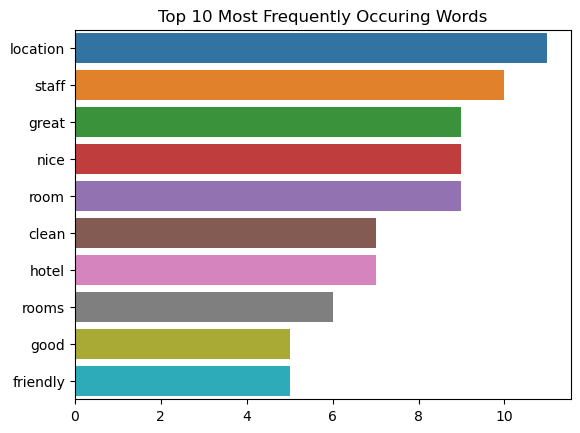

In [112]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [113]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])

In [114]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

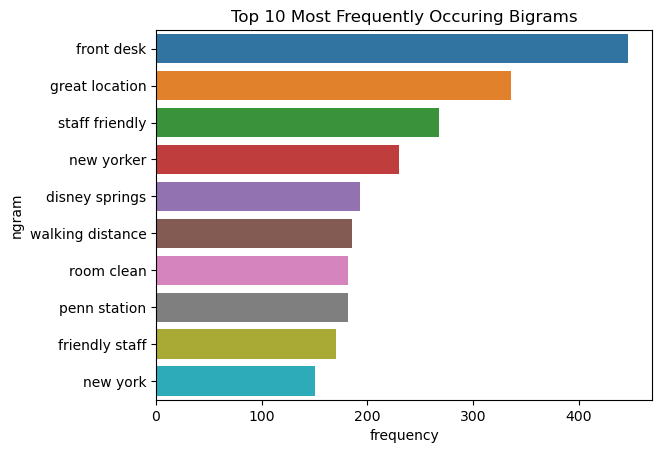

In [115]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [116]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Review'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

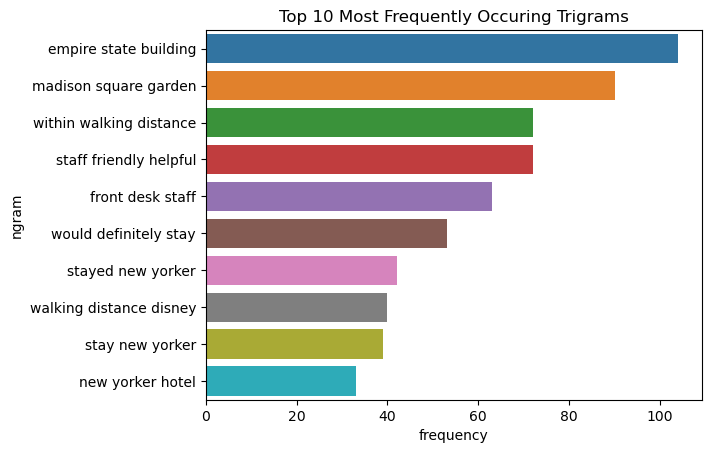

In [117]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

-----------------------------------------------------------------------------------------

                                 Location Summery

In [118]:
location_summary = df.groupby('Location').agg(
    Total_Reviews=('Review', 'count'),
    
).reset_index()

location_summary = location_summary.sort_values(by='Total_Reviews', ascending=False)

In [119]:
location_summary.head(10)

,Location,Total_Reviews
929,United States of America,4804
564,New York,34
122,California,19
769,San Jose,19
244,Florida,16
125,Canada,16
928,United Kingdom,14
567,"New York, NY",13
902,Toronto,12
488,Miami,12
